In [1]:
!pip install scikit-learn keras

In [55]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
#load the IRis dataset

iris_data = load_iris()

#print(iris_data)
X= iris_data.data
y = (iris_data.target==0).astype(int) #Binary classification considering only setosa.

#split the train and test data

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Standardize the data
scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)


In [42]:
model = Sequential()

#adding input layer
model.add(Dense(units=6,activation='relu',input_dim=4))

#add hidden layer
model.add(Dense(units=6,activation='relu'))

#add output layer
model.add(Dense(units=1,activation='sigmoid'))

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 30        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,epochs=15,batch_size=8,validation_split=0.2)

Epoch 1/15
12/12 [==============================] - 1s 19ms/step - loss: 0.6396 - accuracy: 0.5312 - val_loss: 0.6726 - val_accuracy: 0.4167
Epoch 2/15
12/12 [==============================] - 0s 4ms/step - loss: 0.6133 - accuracy: 0.6354 - val_loss: 0.6445 - val_accuracy: 0.5833
Epoch 3/15
12/12 [==============================] - 0s 6ms/step - loss: 0.5884 - accuracy: 0.8229 - val_loss: 0.6161 - val_accuracy: 0.8750
Epoch 4/15
12/12 [==============================] - 0s 4ms/step - loss: 0.5621 - accuracy: 0.8646 - val_loss: 0.5876 - val_accuracy: 0.9167
Epoch 5/15
12/12 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.8750 - val_loss: 0.5551 - val_accuracy: 0.9583
Epoch 6/15
12/12 [==============================] - 0s 4ms/step - loss: 0.5055 - accuracy: 0.9062 - val_loss: 0.5213 - val_accuracy: 0.9583
Epoch 7/15
12/12 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.9271 - val_loss: 0.4860 - val_accuracy: 0.9583
Epoch 8/15
12/12 [=

1/1 [==============================] - 0s 74ms/step - loss: 0.5502 - accuracy: 0.7000
Loss:0.5502, Accuracy:0.7000
[[11  9]
 [ 0 10]]


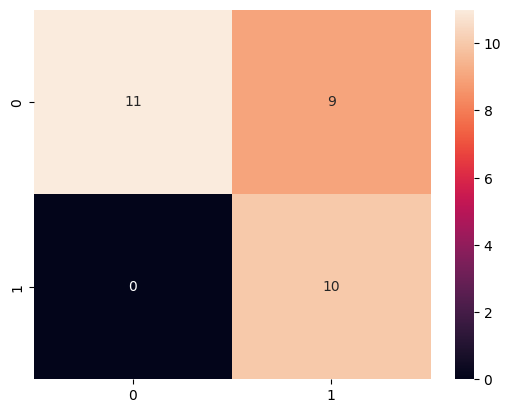

In [57]:

y_pred= model.predict(X_test)
y_pred = (y_pred > 0.2)

loss,accuracy = model.evaluate(X_test,y_pred)
print(f'Loss:{loss:.4f}, Accuracy:{accuracy:.4f}')

matrix = confusion_matrix(y_test, y_pred)

print(matrix)

sns.heatmap(matrix,annot=True)
plt.show()
